In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [8]:
# Load the data
df = pd.read_csv('./historicalData/btc-usd.csv')

# Display the first few rows of the data
df.head()

,snapped_at,price,market_cap,total_volume
0,2013-04-28 00:00:00 UTC,135.30,1.500518e+09,0.0
1,2013-04-29 00:00:00 UTC,141.96,1.575032e+09,0.0
2,2013-04-30 00:00:00 UTC,135.30,1.501657e+09,0.0
3,2013-05-01 00:00:00 UTC,117.00,1.298952e+09,0.0
4,2013-05-02 00:00:00 UTC,103.43,1.148668e+09,0.0


In [9]:
# Convert the 'Date' column to datetime format
df['snapped_at'] = pd.to_datetime(df['snapped_at'])

# Set 'Date' as the index
df.set_index('snapped_at', inplace=True)

# Display the first few rows of the data
df.head()

,price,market_cap,total_volume
snapped_at,,,
2013-04-28 00:00:00+00:00,135.30,1.500518e+09,0.0
2013-04-29 00:00:00+00:00,141.96,1.575032e+09,0.0
2013-04-30 00:00:00+00:00,135.30,1.501657e+09,0.0
2013-05-01 00:00:00+00:00,117.00,1.298952e+09,0.0
2013-05-02 00:00:00+00:00,103.43,1.148668e+09,0.0


In [11]:
# Calculate daily log returns
df['log_returns'] = np.log(df['price'] / df['price'].shift(1))

# Drop the first row since it will have NaN for the log return
df.dropna(inplace=True)

# Display the first few rows of the log returns
df[['price', 'Log_Returns']].head()

,price,Log_Returns
snapped_at,,
2013-04-29 00:00:00+00:00,141.96,0.048051
2013-04-30 00:00:00+00:00,135.30,-0.048051
2013-05-01 00:00:00+00:00,117.00,-0.145321
2013-05-02 00:00:00+00:00,103.43,-0.123279
2013-05-03 00:00:00+00:00,91.01,-0.127926


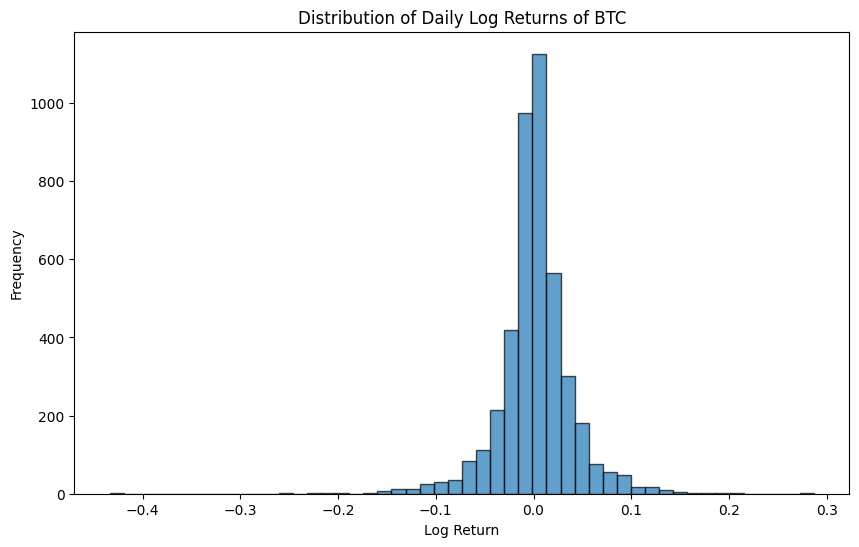

In [12]:
# Plot the distribution of daily returns
plt.figure(figsize=(10, 6))
plt.hist(df['Log_Returns'], bins=50, edgecolor='black', alpha=0.7)
plt.title('Distribution of Daily Log Returns of BTC')
plt.xlabel('Log Return')
plt.ylabel('Frequency')
plt.show()